In [1]:
import tensorflow as tf 
print(tf.__version__)

2.6.0


**Application of Neural Network to Binary Output Classification**

In [2]:
import seaborn as sns 
import pandas as pd 
import numpy as np 
from tensorflow.keras.layers import Dense, Dropout, Activation 
from tensorflow.keras.models import Model, Sequential 
from tensorflow.keras.optimizers import Adam
banknote_data = pd.read_csv('https://raw.githubusercontent.com/AbhiRoy96/Banknote-Authentication-UCI-Dataset/master/bank_notes.csv')
banknote_data.head()

,variance,skewness,curtosis,entropy,Target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
banknote_data.shape

(1372, 5)

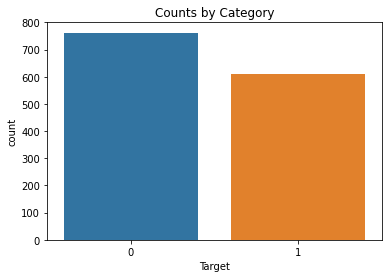

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
ax=plt.axes()
sns.countplot(x='Target', data=banknote_data, ax=ax)
ax.set_title('Counts by Category')
plt.show()

In [5]:
# Determine X and y
X = banknote_data.drop(['Target'], axis=1).values
y = banknote_data[['Target']].values 
print(X.shape) 
print(y.shape)

(1372, 4)
(1372, 1)


In [6]:
# Create train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [7]:
# Standardize the variables
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()  
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [8]:
# Create the Neural Network
def create_model(learning_rate, dropout_rate): 
  model = Sequential() 
  model.add(Dense(12, input_dim=X_train.shape[1], activation='relu')) 
  model.add(Dropout(dropout_rate)) 
  model.add(Dense(6, activation='relu')) 
  model.add(Dropout(dropout_rate)) 
  model.add(Dense(1, activation='sigmoid')) 
  adam = Adam(lr=learning_rate) 
  model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
  return model

In [9]:
# Set the hyperparameters
dropout_rate = 0.1 
epochs = 20 
batch_size = 4 
learn_rate = 0.001

In [10]:
model = create_model(learn_rate, dropout_rate)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


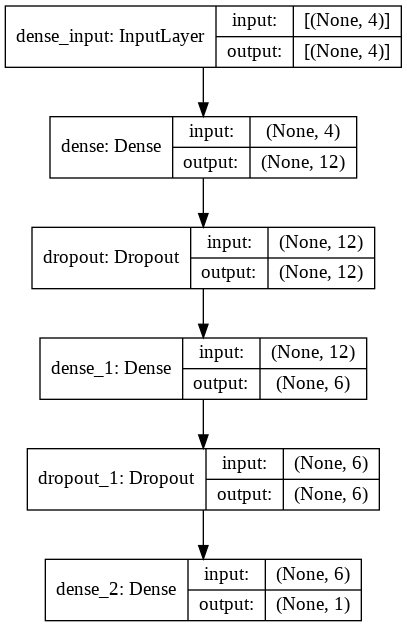

In [11]:
# Visualize model structure
from tensorflow.keras.utils import plot_model  
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

In [12]:
model_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1)

Epoch 1/20
220/220 [==============================] - 1s 2ms/step - loss: 0.6511 - accuracy: 0.5872 - val_loss: 0.5809 - val_accuracy: 0.5909
Epoch 2/20
220/220 [==============================] - 0s 2ms/step - loss: 0.5016 - accuracy: 0.7777 - val_loss: 0.4398 - val_accuracy: 0.8773
Epoch 3/20
220/220 [==============================] - 0s 2ms/step - loss: 0.3710 - accuracy: 0.8814 - val_loss: 0.2921 - val_accuracy: 0.9318
Epoch 4/20
220/220 [==============================] - 0s 2ms/step - loss: 0.2534 - accuracy: 0.9270 - val_loss: 0.1783 - val_accuracy: 0.9591
Epoch 5/20
220/220 [==============================] - 0s 2ms/step - loss: 0.1738 - accuracy: 0.9418 - val_loss: 0.1107 - val_accuracy: 0.9682
Epoch 6/20
220/220 [==============================] - 0s 2ms/step - loss: 0.1321 - accuracy: 0.9544 - val_loss: 0.0732 - val_accuracy: 0.9818
Epoch 7/20
220/220 [==============================] - 0s 2ms/step - loss: 0.0908 - accuracy: 0.9692 - val_loss: 0.0502 - val_accuracy: 0.9864
Epoch 

In [13]:
# Model Performance
accuracies = model.evaluate(X_test, y_test, verbose=1)
print('Test Score;', accuracies[0]) 
print('Test Accuracy:', accuracies[1])

9/9 [==============================] - 0s 2ms/step - loss: 0.0189 - accuracy: 0.9927
Test Score; 0.01886463724076748
Test Accuracy: 0.9927272796630859


Visualize the model performance for the training and test datasets.

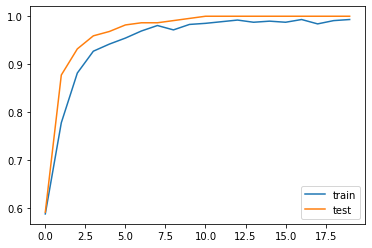

In [14]:
plt.plot(model_history.history['accuracy'], label = 'accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy') 
plt.legend(['train', 'test'])

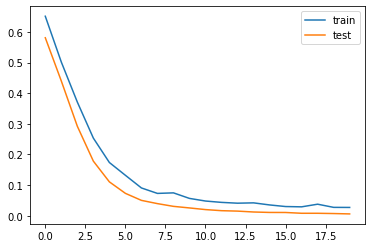

In [15]:
plt.plot(model_history.history['loss'], label = 'loss') 
plt.plot(model_history.history['val_loss'], label = 'val_loss') 
plt.legend(['train','test'])

**Application of Neural Network to Multiclass Output**

There are three changes compared to the simple class output:


- Change the number of nodes in the final dense layer to the number of target labels in the output.

- Change the activation function in the final dense layer from sigmoid to softmax.

- Change the loss function in the compile method of the model from binary_crossentropy to categorical_crossentropy.







In [16]:
import seaborn as sns
import pandas as pd
import numpy as np 
from tensorflow.keras.layers import Dense, Dropout, Activation 
from tensorflow.keras.models import Model, Sequential 
from tensorflow.keras.optimizers import Adam
iris_data = sns.load_dataset('iris')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
X = iris_data.drop(['species'], axis=1) 
y = pd.get_dummies(iris_data.species, prefix='output') 
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
y.head()

,output_setosa,output_versicolor,output_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [19]:
X = X.values 
y = y.values

In [20]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [22]:
def create_model_multiple_outs(learning_rate, dropout_rate): 
  model = Sequential() 
  model.add(Dense(12, input_dim=X_train.shape[1], activation='relu')) 
  model.add(Dropout(dropout_rate)) 
  model.add(Dense(6, activation='relu')) 
  model.add(Dropout(dropout_rate)) 
  model.add(Dense(y_train.shape[1], activation='softmax')) 
  adam = Adam(lr=learning_rate)
  model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy']) 
  return model

In [23]:
dropout_rate = 0.1 
epochs = 50 
batch_size = 1 
learn_rate = 0.001

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


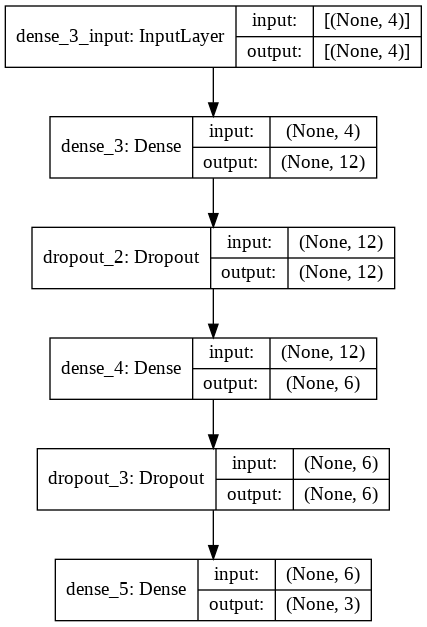

In [24]:
model = create_model_multiple_outs(learn_rate, dropout_rate) 
from tensorflow.keras.utils import plot_model 
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

In [25]:
model_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1)

Epoch 1/50
96/96 [==============================] - 1s 3ms/step - loss: 1.1746 - accuracy: 0.2812 - val_loss: 0.9979 - val_accuracy: 0.3750
Epoch 2/50
96/96 [==============================] - 0s 2ms/step - loss: 1.0382 - accuracy: 0.3958 - val_loss: 0.8889 - val_accuracy: 0.5833
Epoch 3/50
96/96 [==============================] - 0s 2ms/step - loss: 0.9379 - accuracy: 0.5521 - val_loss: 0.7931 - val_accuracy: 0.8333
Epoch 4/50
96/96 [==============================] - 0s 2ms/step - loss: 0.8903 - accuracy: 0.6979 - val_loss: 0.7121 - val_accuracy: 0.8750
Epoch 5/50
96/96 [==============================] - 0s 2ms/step - loss: 0.8035 - accuracy: 0.8021 - val_loss: 0.6338 - val_accuracy: 0.8750
Epoch 6/50
96/96 [==============================] - 0s 2ms/step - loss: 0.7091 - accuracy: 0.8229 - val_loss: 0.5621 - val_accuracy: 0.9167
Epoch 7/50
96/96 [==============================] - 0s 2ms/step - loss: 0.6387 - accuracy: 0.8333 - val_loss: 0.4826 - val_accuracy: 0.9167
Epoch 8/50
96/96 [==

In [26]:
accuracies = model.evaluate(X_test, y_test, verbose=1) 
print('Test Score:', accuracies[0]) 
print('Test Accuracy:', accuracies[1])

1/1 [==============================] - 0s 124ms/step - loss: 0.0596 - accuracy: 0.9667
Test Score: 0.059566792100667953
Test Accuracy: 0.9666666388511658


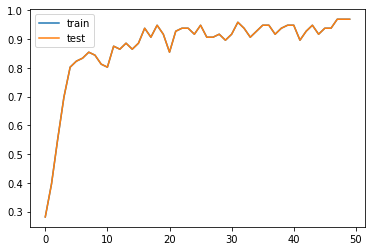

In [27]:
import matplotlib.pyplot as plt 
plt.plot(model_history.history['accuracy'], label = 'accuracy') 
plt.plot(model_history.history['accuracy'], label = 'val_accuracy') 
plt.legend(['train', 'test'])

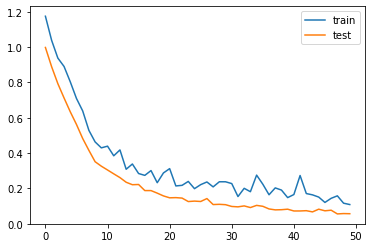

In [28]:
import matplotlib.pyplot as plt 
plt.plot(model_history.history['loss'], label = 'loss') 
plt.plot(model_history.history['val_loss'], label = 'val_loss') 
plt.legend(['train','test'])